In [25]:
import pandas as pd
import  sklearn.datasets  as ds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [26]:
X, y = ds.make_circles(n_samples = 1000,noise =0.1,factor=.7) 

<AxesSubplot:>

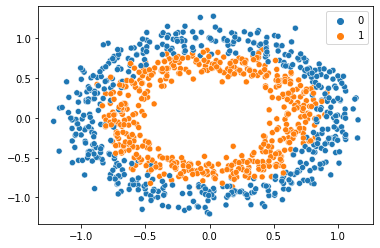

In [27]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
data = pd.DataFrame(X,columns = ["feat_1","feat_2"])
data["target"] = y

In [5]:
X = data[["feat_1","feat_2"]].copy()
y = data["target"]

In [6]:
features = list(X.columns)


In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [8]:
data.head()

,feat_1,feat_2,target
0,0.008706,-1.049286,0
1,1.119477,-0.202703,0
2,-0.883246,0.503072,0
3,-0.503986,0.483645,1
4,-0.191254,-1.050485,0


In [9]:
feat='feat_2'

In [10]:
tree_splitter = DecisionTreeClassifier(max_depth=11, min_samples_leaf=0.10, max_features=1)
X_to_split = X_train[[feat]]
tree_splitter.fit(X_to_split,y_train)

DecisionTreeClassifier(max_depth=11, max_features=1, min_samples_leaf=0.1)

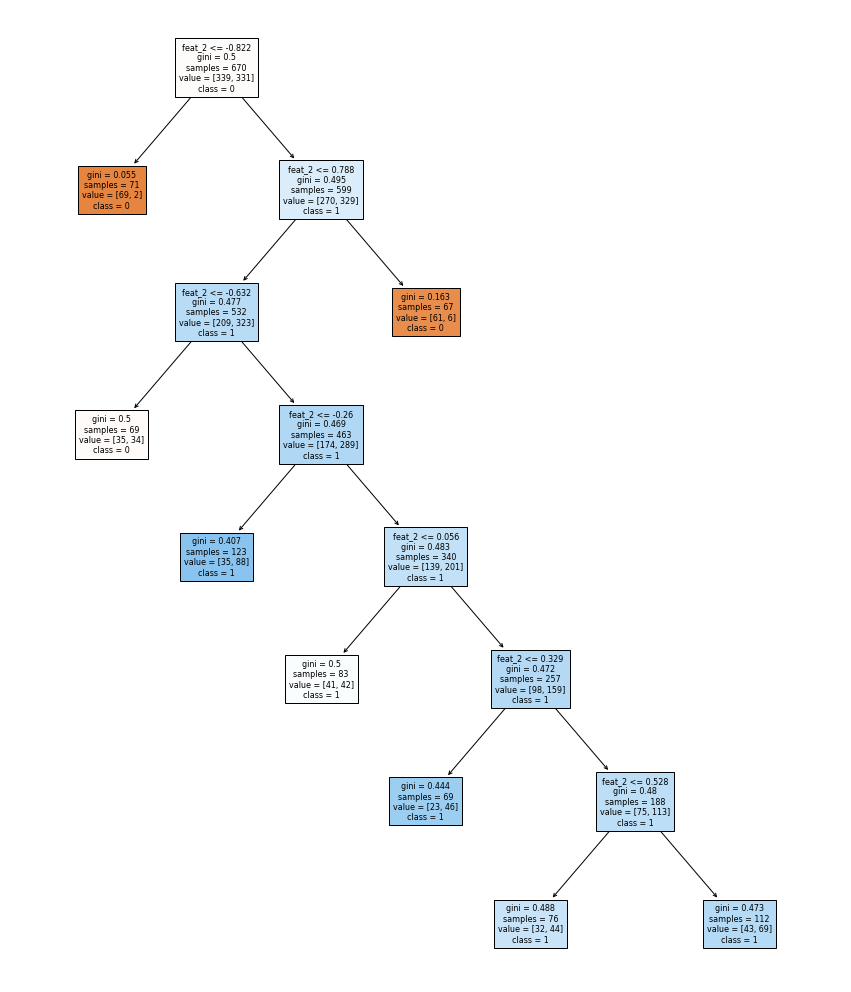

In [11]:
fig = plt.figure(figsize=(15,18))
_ = plot_tree(tree_splitter, 
                   feature_names=[feat],  
                   class_names=['0','1'],
                   filled=True,fontsize=8)

In [12]:
X_to_split[f"{feat}_node"] = tree_splitter.apply(X_to_split)

In [13]:
X_to_split

,feat_2,feat_2_node
703,-0.061272,8
311,0.857012,14
722,0.014234,8
629,0.685275,13
0,-1.049286,1
...,...,...
106,0.681987,13
270,-0.614649,6
860,0.557638,13
435,-0.637943,4


In [14]:
X_to_split[f"{feat}_node"].value_counts(1)

6     0.183582
13    0.167164
8     0.123881
12    0.113433
1     0.105970
10    0.102985
4     0.102985
14    0.100000
Name: feat_2_node, dtype: float64

In [15]:
X_to_split_bins =  X_to_split.groupby(f"{feat}_node")[feat].agg(["min","max"])

In [16]:
X_to_split_bins

,min,max
feat_2_node,,
1,-1.238171,-0.822455
4,-0.821139,-0.632763
6,-0.631084,-0.260796
8,-0.259061,0.055123
10,0.056515,0.326988
12,0.330608,0.527561
13,0.528823,0.783165
14,0.793534,1.205540


In [17]:
X_to_split_bins["interval"] =X_to_split_bins.apply(lambda x: pd.Interval(x["min"],x["max"]),axis=1)
dict_to_split_bins = X_to_split_bins["interval"].to_dict()

In [18]:
X_to_split_bins

,min,max,interval
feat_2_node,,,
1,-1.238171,-0.822455,"(-1.2381708494325538, -0.822455067169342]"
4,-0.821139,-0.632763,"(-0.821138966685077, -0.63276278139329]"
6,-0.631084,-0.260796,"(-0.6310842438755885, -0.2607958125172655]"
8,-0.259061,0.055123,"(-0.25906074268212154, 0.05512267416256206]"
10,0.056515,0.326988,"(0.05651482310122287, 0.3269879312555314]"
12,0.330608,0.527561,"(0.33060754150817945, 0.5275607703257634]"
13,0.528823,0.783165,"(0.5288233996993007, 0.783164750116879]"
14,0.793534,1.205540,"(0.7935336859081781, 1.2055402507454818]"


In [19]:
dict_to_split_bins

{1: Interval(-1.2381708494325538, -0.822455067169342, closed='right'),
 4: Interval(-0.821138966685077, -0.63276278139329, closed='right'),
 6: Interval(-0.6310842438755885, -0.2607958125172655, closed='right'),
 8: Interval(-0.25906074268212154, 0.05512267416256206, closed='right'),
 10: Interval(0.05651482310122287, 0.3269879312555314, closed='right'),
 12: Interval(0.33060754150817945, 0.5275607703257634, closed='right'),
 13: Interval(0.5288233996993007, 0.783164750116879, closed='right'),
 14: Interval(0.7935336859081781, 1.2055402507454818, closed='right')}

In [20]:
X_train[f"{feat}_op_bin"] = X_to_split[f"{feat}_node"].map(dict_to_split_bins)

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
X_train

,feat_1,feat_2,feat_2_op_bin
703,-0.730880,-0.061272,"(-0.25906074268212154, 0.05512267416256206]"
311,-0.354014,0.857012,"(0.7935336859081781, 1.2055402507454818]"
722,-0.686427,0.014234,"(-0.25906074268212154, 0.05512267416256206]"
629,-0.914730,0.685275,"(0.5288233996993007, 0.783164750116879]"
0,0.008706,-1.049286,"(-1.2381708494325538, -0.822455067169342]"
...,...,...,...
106,0.034212,0.681987,"(0.5288233996993007, 0.783164750116879]"
270,0.057082,-0.614649,"(-0.6310842438755885, -0.2607958125172655]"
860,0.905852,0.557638,"(0.5288233996993007, 0.783164750116879]"
435,0.714838,-0.637943,"(-0.821138966685077, -0.63276278139329]"


In [22]:
data_train = X_train.copy()

In [23]:
data_train["n"] = 1
data_train["target"] = y_train

In [24]:
data_train.pivot_table(index = [f"{feat}_op_bin"], columns = ["target"],values="n",aggfunc="count")

target,0,1
feat_2_op_bin,,
"(-1.2381708494325538, -0.822455067169342]",69,2
"(-0.821138966685077, -0.63276278139329]",35,34
"(-0.6310842438755885, -0.2607958125172655]",35,88
"(-0.25906074268212154, 0.05512267416256206]",41,42
"(0.05651482310122287, 0.3269879312555314]",23,46
"(0.33060754150817945, 0.5275607703257634]",32,44
"(0.5288233996993007, 0.783164750116879]",43,69
"(0.7935336859081781, 1.2055402507454818]",61,6
